In [1]:
%pylab inline
from pandas import *
import pickle

Populating the interactive namespace from numpy and matplotlib


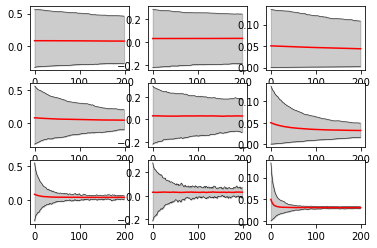

In [2]:
driftCollector=pickle.load(open("driftCollector.p","rb"))
where=1
name=["E","P","HD"]
for my in [0.0001,0.001,0.01]:
    for who in range(3):
        subplot(3,3,where)
        D=driftCollector["{0} {1}".format(my,name[who])]
        D=numpy.array(D)
        Dmin=D.min(0)
        Dmax=D.max(0)
        fill_between(range(200),Dmin,Dmax,color='k',alpha=0.2)
        plot(Dmax,'k',linewidth=0.5)
        plot(Dmin,'k',linewidth=0.5)
        plot(D.mean(0),'r')
        where+=1

In [3]:
def myEval(S):
    s=S.replace("]","").replace("[","")
    R=[]
    for e in s.split(","):
        R.append(float(e))
    return R

def myEval2D(S):
    M=[]
    s=S.replace("[[","").replace("]]","")
    for E in s.split("],["):
        R=[]
        for e in E.split(","):
            R.append(float(e))
        M.append(R)
    return M

In [4]:
def rolling_average(data, window_size):
    if window_size < 1:
        raise ValueError("window_size must be at least 1")

    # Calculate padding size
    pad_size = window_size // 2

    # Pad the data at both ends with repeated boundary values
    padded_data = np.pad(data, pad_width=pad_size, mode='edge')

    # Calculate the rolling average using a uniform filter
    rolling_avg = np.convolve(padded_data, np.ones(window_size)/window_size, mode='valid')

    return rolling_avg

def step_function_expand(lists, target_length):
    expanded_lists = []
    
    for lst in lists:
        current_length = len(lst)
        
        # Generate the original x-axis values based on the current length
        x_original = np.linspace(0, 1, current_length, endpoint=False)
        
        # Generate the new x-axis values for the target length
        x_target = np.linspace(0, 1, target_length, endpoint=False)
        
        # Create a list to store the expanded values
        expanded_list = []
        
        # Use step function to repeat each value until the next one
        for i in range(current_length - 1):
            start = x_original[i]
            end = x_original[i + 1]
            count = np.sum((x_target >= start) & (x_target < end))
            expanded_list.extend([lst[i]] * count)
        
        # Handle the last segment separately (from last original x to the end)
        count = np.sum(x_target >= x_original[-1])
        expanded_list.extend([lst[-1]] * count)
        
        expanded_lists.append(expanded_list)
    
    return expanded_lists

#L=step_function_expand(E[0],5000)
#plot(rolling_average(numpy.array(L).mean(0),10))

In [5]:
collector=dict()
Mys=[0.0001,0.001,0.01]
Ks=[1,3,5,7]
for K in Ks:
    for my in Mys:
        E=[]
        P=[]
        HD=[]
        for i in range(21):
            E.append([])
            P.append([])
            HD.append([])
        for rep in range(50):
            #for who in range(3):
            data=read_csv(r"C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart\data_{0}_{1}_{2}.csv".format(K,my,rep))
            for i in range(len(data)):
                pos=data["dip0peak1"][i]
                dummy=myEval(data["LODe"][i])
                E[pos].append(dummy)
                dummy=myEval(data["LODp"][i])
                P[pos].append(dummy)
                dummy=myEval(data["LODhd"][i])
                HD[pos].append(dummy)
        collector["{0} {1}".format(K,my)]=[E,P,HD]
        
        

In [8]:
sample_lengths = [len(row) for row in collector["1 0.0001"][1][0]]
print("Sample lengths for first line (K=1, mu=0.0001):", sample_lengths)


Sample lengths for first line (K=1, mu=0.0001): [37, 16, 47, 32, 34, 24, 23, 14, 42, 37, 27, 102, 65, 48, 49, 52, 14, 26, 164, 38, 42, 18, 26, 22, 41, 37, 27, 29, 31, 17, 24, 30, 46, 64, 40, 29, 23, 30, 15, 32, 39, 36, 27, 50, 30, 24, 24, 35, 41, 18, 26, 48, 132, 109, 66, 36, 26, 92, 25, 51, 25, 36, 19, 32, 30, 42, 33, 100, 57, 48, 19, 32, 43, 16, 36, 15, 19, 25, 33, 41, 35, 61, 62, 166, 38, 33, 64, 21, 35, 26, 27, 34, 27, 53, 31, 36, 29, 47, 32, 42, 16, 68, 73, 26, 37, 51, 29, 21, 26, 30, 27, 229, 166, 21, 27, 34, 18, 30, 26, 22, 26, 32, 70, 26, 30, 32, 49, 27, 24, 92, 39, 23, 52, 45, 23, 73, 23, 47, 35, 29, 33, 29, 36, 21, 54, 25, 30, 49, 38, 95, 24, 37, 178, 47, 35, 37, 103, 35, 68, 20, 34, 35, 20, 24, 34, 57, 89, 25, 38, 39, 45, 59, 83, 36, 31, 34, 22, 25, 21, 54, 51, 54, 25, 92, 35, 44, 20, 77, 29, 39, 19, 15, 29, 25, 43, 45, 35, 39, 41, 38, 33, 51, 74, 93, 23, 21, 28, 12, 53, 44, 129, 24, 105, 33, 14, 33, 25, 50, 64, 30, 41, 35, 45, 36, 42, 41, 30, 28, 15, 55, 26, 46, 46, 54, 81,

In [9]:
print("Sample row 1:", collector["1 0.0001"][1][0][0])
print("Sample row 2:", collector["1 0.0001"][1][0][1])


Sample row 1: [-0.20294, -0.20294, -0.20294, -0.20294, -0.20294, -0.20294, -0.20294, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.114437, -0.107567]
Sample row 2: [0.302923, 0.302923, 0.302923, 0.302923, 0.292565, 0.292565, 0.292565, 0.292565, 0.292565, 0.292565, 0.292565, 0.292565, 0.292565, 0.241628, 0.241628, 0.241628]


In [12]:
collectorShrunk=dict()
where=1
for my in Mys:
    for K in Ks:
        res=[]
        for who in range(3):
            M=collector["{0} {1}".format(K,my)][who]
            R=[]
            for i in range(21):
                L=[]
                for row in M[i]:
                    L.append(len(row))
                binWidth=10
                theLength=int(ceil(mean(L))*binWidth)
                Y=numpy.array(step_function_expand(M[i],theLength))
                Y=Y.mean(0)
                Y = Y.reshape(-1, 10).mean(axis=1)
                R.append(Y)
            res.append(R)
        collectorShrunk["{0} {1}".format(K,my)]=res

In [13]:
import numpy as np
import pandas as pd
from math import ceil
from statistics import mean
from scipy.stats import ttest_ind, ks_2samp
from IPython.display import display

def cohens_d(group1, group2):
    """
    Calculate Cohen's d for two independent groups.
    """
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)

    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    return d

def step_function_expand(lists, target_length):
    expanded_lists = []
    for lst in lists:
        current_length = len(lst)
        x_original = np.linspace(0, 1, current_length, endpoint=False)
        x_target = np.linspace(0, 1, target_length, endpoint=False)
        expanded_list = []
        for i in range(current_length - 1):
            start = x_original[i]
            end = x_original[i + 1]
            count = np.sum((x_target >= start) & (x_target < end))
            expanded_list.extend([lst[i]] * count)
        count = np.sum(x_target >= x_original[-1])
        expanded_list.extend([lst[-1]] * count)
        expanded_lists.append(expanded_list)
    return expanded_lists

# Define parameter sets
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]
who = 1  # Index 1 for 'P' (LODp)

# Prepare results table
results = []

# Main loop over collector
for K in Ks:
    for my in Mys:
        M = collector[f"{K} {my}"][who]  # who=1 selects LODp
        for i in range(21):  # For each of the 21 lines
            row_data = M[i]
            lengths = [len(row) for row in row_data if len(row) > 1]
            if not lengths:
                continue
            binWidth = 10
            theLength = int(ceil(mean(lengths)) * binWidth)
            expanded = step_function_expand(row_data, theLength)
            arr = np.array(expanded)

            # Get first and last generation values
            first_gen_vals = arr[:, 0]
            last_gen_vals = arr[:, -1]

            if len(first_gen_vals) > 1 and len(last_gen_vals) > 1:
                d = cohens_d(first_gen_vals, last_gen_vals)
                t_stat, t_p = ttest_ind(first_gen_vals, last_gen_vals, equal_var=False)
                ks_stat, ks_p = ks_2samp(first_gen_vals, last_gen_vals)

                results.append({
                    'K': K,
                    'mu': my,
                    'line': i,
                    "Cohen's d": d,
                    'KS-test p': ks_p
                })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Display nicely
display(df_results)

# Optional: Save to file
# df_results.to_csv("cohens_d_results.csv", index=False)
# df_results.to_excel("cohens_d_results.xlsx", index=False)


K      mu  line  Cohen's d     KS-test p
0    1  0.0001     0  -0.084940  2.209764e-01
1    1  0.0001     1  -0.098348  2.874526e-03
2    1  0.0001     2  -0.051242  1.637913e-02
3    1  0.0001     3  -0.027269  5.868921e-02
4    1  0.0001     4  -0.025002  4.158608e-02
..  ..     ...   ...        ...           ...
247  7  0.0100    16   0.022750  1.796150e-08
248  7  0.0100    17  -0.061624  7.848025e-13
249  7  0.0100    18   0.020905  7.102426e-07
250  7  0.0100    19  -0.103637  7.848025e-13
251  7  0.0100    20  -0.188121  3.965544e-14

[252 rows x 5 columns]

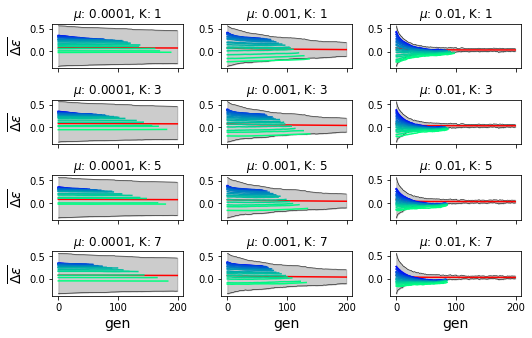

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

# Define plot parameters
plt.figure(figsize=(7.5, 5))  # Larger figure for better visibility
where = 1
num_rows = 4  # 4 rows for each K
num_cols = 3  # 3 columns for each mutation rate

# Loop through K values (rows) and mutation rates (columns)
for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)  # Create subplot
        where += 1
        
        # Load and plot drift data
        D = driftCollector[f"{my} {names[0]}"]
        D = np.array(D)
        Dmin = D.min(0)
        Dmax = D.max(0)
        ax.fill_between(range(200), Dmin, Dmax, color='k', alpha=0.2)
        ax.plot(Dmax, 'k', linewidth=0.5)
        ax.plot(Dmin, 'k', linewidth=0.5)
        ax.plot(D.mean(0), 'r')

        # Load and plot shrunk data
        M = collectorShrunk[f"{K} {my}"][0]
        for i in range(21):
            ax.plot(M[i], color=cmapWinter(np.linspace(0, 1, 21)[i]))

        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{\Delta \epsilon}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14)
        else:
            ax.set_xticklabels([])  # Remove x-tick labels for other rows

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for better spacing
plt.savefig('LODE_new.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [17]:
collectorShrunk = dict()
where = 1
for my in Mys:
    for K in Ks:
        res = []
        ci_all = []  # to store CIs
        for who in range(3):
            M = collector["{0} {1}".format(K, my)][who]
            R = []
            CIs = []  # per-trait list of (ci_lower, ci_upper)

            for i in range(21):
                L = [len(row) for row in M[i]]
                binWidth = 10
                theLength = int(ceil(mean(L)) * binWidth)

                # Expand and bin
                Y = np.array(step_function_expand(M[i], theLength))  # shape: (reps, time)
                Y_binned = Y.reshape(len(Y), -1, binWidth).mean(axis=2)  # shape: (reps, bins)

                # Compute mean and CI
                mean_line = Y_binned.mean(axis=0)
                stderr = Y_binned.std(axis=0, ddof=1) / np.sqrt(Y_binned.shape[0])
                ci_upper = mean_line + 1.96 * stderr
                ci_lower = mean_line - 1.96 * stderr

                R.append(mean_line)
                CIs.append((ci_lower, ci_upper))

            res.append(R)
            ci_all.append(CIs)

        collectorShrunk["{0} {1}".format(K, my)] = [res, ci_all]


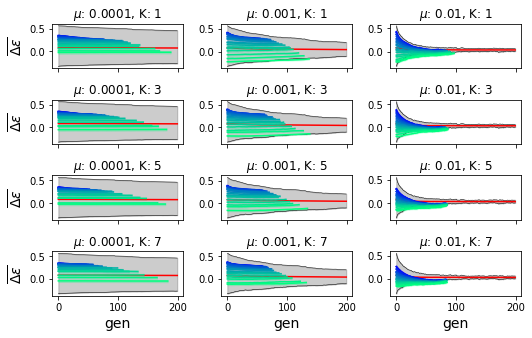

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

# Start figure
plt.figure(figsize=(7.5, 5))
where = 1
num_rows = 4
num_cols = 3

for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1

        # Plot drift data
        D = np.array(driftCollector[f"{my} {names[0]}"])
        Dmin = D.min(0)
        Dmax = D.max(0)
        ax.fill_between(range(200), Dmin, Dmax, color='k', alpha=0.2)
        ax.plot(Dmax, 'k', linewidth=0.5)
        ax.plot(Dmin, 'k', linewidth=0.5)
        ax.plot(D.mean(0), 'r')

        # Load shrunk data and CIs for trait 'E' (index 0)
        mean_lines = collectorShrunk[f"{K} {my}"][0][0]
        ci_bounds = collectorShrunk[f"{K} {my}"][1][0]

        colors = cmapWinter(np.linspace(0, 1, 21))
        for i in range(21):
            ci_lower, ci_upper = ci_bounds[i]
            x = np.arange(len(mean_lines[i]))
            ax.fill_between(x, ci_lower, ci_upper, color=colors[i], alpha=0.2)
            ax.plot(mean_lines[i], color=colors[i])

        # Titles and axis labels
        ax.set_title(f"$\\mu$: {my}, K: {K}", fontsize=12)
        if col == 0:
            ax.set_ylabel(r"$\overline{\Delta \epsilon}$", fontsize=14)
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14)
        else:
            ax.set_xticklabels([])

# Final layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('LODE_new_CI.pdf', dpi=300, bbox_inches='tight')
plt.show()


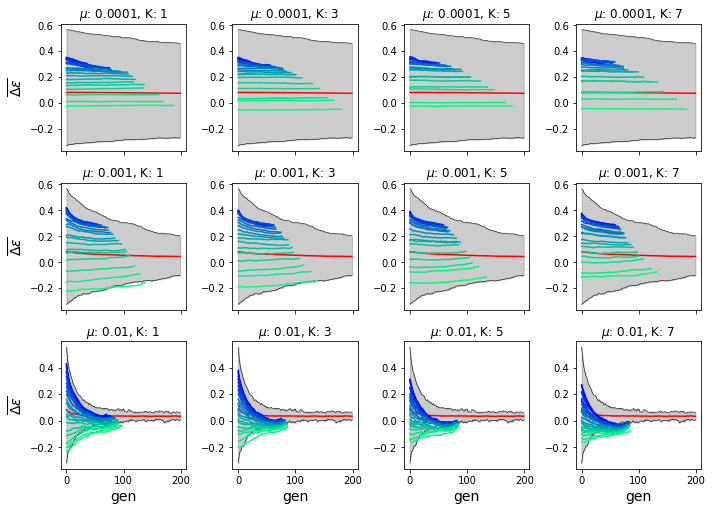

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define plot parameters
plt.figure(figsize=(10, 7.5))  # Larger figure for better visibility
where = 1
num_rows = 3
num_cols = 4

# Loop through mutation rates and K values
for row, my in enumerate(Mys):
    for col, K in enumerate(Ks):
        ax = plt.subplot(num_rows, num_cols, where)  # Create subplot
        where += 1
        
        # Load and plot drift data
        D = driftCollector[f"{my} {names[0]}"]
        D = np.array(D)
        Dmin = D.min(0)
        Dmax = D.max(0)
        ax.fill_between(range(200), Dmin, Dmax, color='k', alpha=0.2)
        ax.plot(Dmax, 'k', linewidth=0.5)
        ax.plot(Dmin, 'k', linewidth=0.5)
        ax.plot(D.mean(0), 'r')

        # Load and plot shrunk data
        M = collectorShrunk[f"{K} {my}"][0]
        for i in range(21):
            ax.plot(M[i], color=cmapWinter(np.linspace(0, 1, 21)[i]))

        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{\Delta \epsilon}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14,)
        else:
            ax.set_xticklabels([])  # Remove x-tick labels for other rows

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for better spacing
plt.savefig('LODE.pdf', dpi=300, bbox_inches='tight')
plt.show()


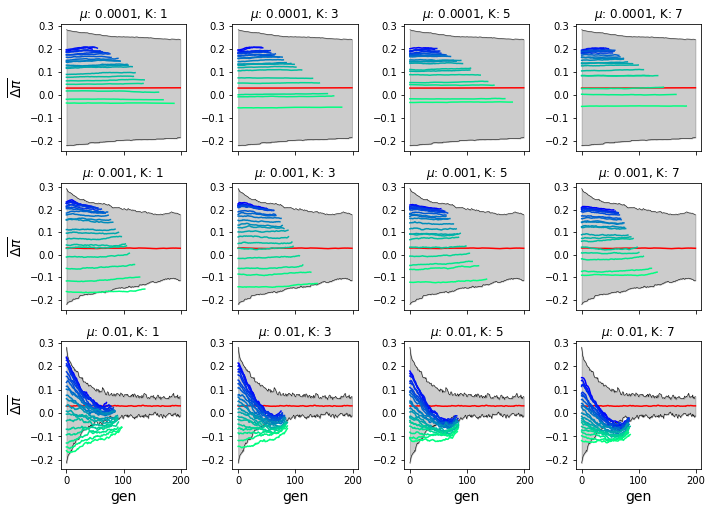

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define plot parameters
plt.figure(figsize=(10, 7.5))  # Larger figure for better visibility
where = 1
num_rows = 3
num_cols = 4

# Loop through mutation rates and K values
for row, my in enumerate(Mys):
    for col, K in enumerate(Ks):
        ax = plt.subplot(num_rows, num_cols, where)  # Create subplot
        where += 1
        
        # Load and plot drift data
        D = driftCollector[f"{my} {names[1]}"]
        D = np.array(D)
        Dmin = D.min(0)
        Dmax = D.max(0)
        ax.fill_between(range(200), Dmin, Dmax, color='k', alpha=0.2)
        ax.plot(Dmax, 'k', linewidth=0.5)
        ax.plot(Dmin, 'k', linewidth=0.5)
        ax.plot(D.mean(0), 'r')

        # Load and plot shrunk data
        M = collectorShrunk[f"{K} {my}"][1]
        for i in range(21):
            ax.plot(M[i], color=cmapWinter(np.linspace(0, 1, 21)[i]))

        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{\Delta \pi}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14,)
        else:
            ax.set_xticklabels([])  # Remove x-tick labels for other rows

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for better spacing
plt.savefig('LODP.pdf', dpi=300, bbox_inches='tight')
plt.show()


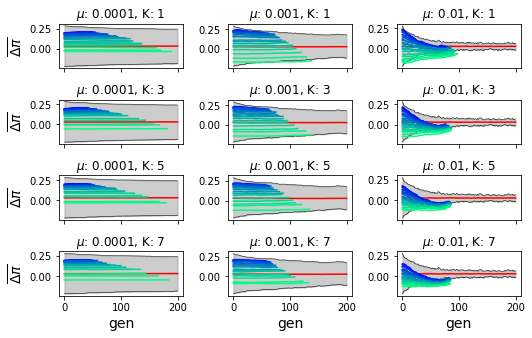

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

# Define plot parameters
plt.figure(figsize=(7.5, 5))  # Adjusted figure size for better visibility
where = 1
num_rows = 4  # 4 rows for each K
num_cols = 3  # 3 columns for each mutation rate

# Loop through K values (rows) and mutation rates (columns)
for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)  # Create subplot
        where += 1
        
        # Load and plot drift data
        D = driftCollector.get(f"{my} {names[1]}")
        if D is not None:
            D = np.array(D)
            Dmin = D.min(axis=0)
            Dmax = D.max(axis=0)
            ax.fill_between(range(len(Dmin)), Dmin, Dmax, color='k', alpha=0.2)
            ax.plot(Dmax, 'k', linewidth=0.5)
            ax.plot(Dmin, 'k', linewidth=0.5)
            ax.plot(D.mean(axis=0), 'r')

        # Load and plot shrunk data
        M = collectorShrunk.get(f"{K} {my}")
        if M:
            M = M[1]  # Extract the relevant data for plotting
            for i in range(21):
                ax.plot(M[i], color=cmapWinter(np.linspace(0, 1, 21)[i]))

        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{\Delta \pi}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14)
        else:
            ax.set_xticklabels([])  # Remove x-tick labels for other rows

# Adjust layout for better spacing and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('LODP_New.pdf', dpi=300, bbox_inches='tight')
plt.show()


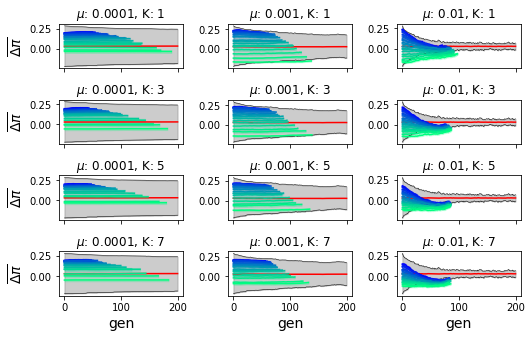

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

# Start figure
plt.figure(figsize=(7.5, 5))
where = 1
num_rows = 4
num_cols = 3

for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1

        # Plot drift data
        D = np.array(driftCollector[f"{my} {names[1]}"])
        Dmin = D.min(0)
        Dmax = D.max(0)
        ax.fill_between(range(200), Dmin, Dmax, color='k', alpha=0.2)
        ax.plot(Dmax, 'k', linewidth=0.5)
        ax.plot(Dmin, 'k', linewidth=0.5)
        ax.plot(D.mean(0), 'r')

        # Load shrunk data and CIs for trait 'E' (index 0)
        mean_lines = collectorShrunk[f"{K} {my}"][0][1]
        ci_bounds = collectorShrunk[f"{K} {my}"][1][1]

        colors = cmapWinter(np.linspace(0, 1, 21))
        for i in range(21):
            ci_lower, ci_upper = ci_bounds[i]
            x = np.arange(len(mean_lines[i]))
            ax.fill_between(x, ci_lower, ci_upper, color=colors[i], alpha=0.2)
            ax.plot(mean_lines[i], color=colors[i])

        # Titles and axis labels
        ax.set_title(f"$\\mu$: {my}, K: {K}", fontsize=12)
        if col == 0:
            ax.set_ylabel(r"$\overline{\Delta \pi}$", fontsize=14)
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14)
        else:
            ax.set_xticklabels([])

# Final layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('LODP_new_CI.pdf', dpi=300, bbox_inches='tight')
plt.show()


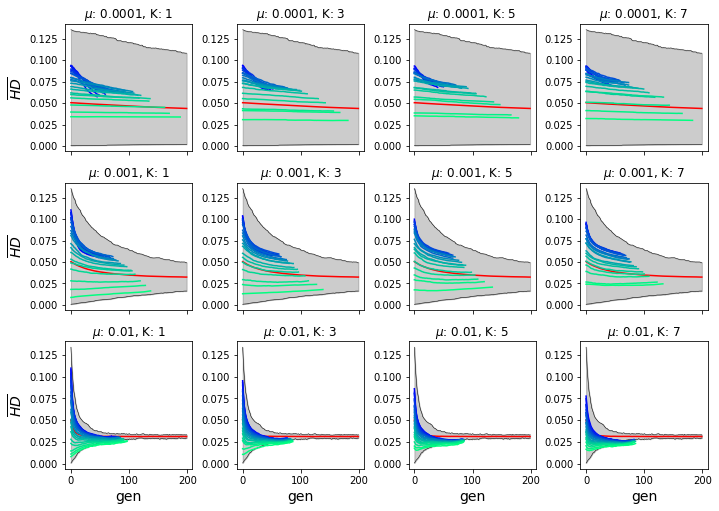

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define plot parameters
plt.figure(figsize=(10, 7.5))  # Larger figure for better visibility
where = 1
num_rows = 3
num_cols = 4

# Loop through mutation rates and K values
for row, my in enumerate(Mys):
    for col, K in enumerate(Ks):
        ax = plt.subplot(num_rows, num_cols, where)  # Create subplot
        where += 1
        
        # Load and plot drift data
        D = driftCollector[f"{my} {names[2]}"]
        D = np.array(D)
        Dmin = D.min(0)
        Dmax = D.max(0)
        ax.fill_between(range(200), Dmin, Dmax, color='k', alpha=0.2)
        ax.plot(Dmax, 'k', linewidth=0.5)
        ax.plot(Dmin, 'k', linewidth=0.5)
        ax.plot(D.mean(0), 'r')

        # Load and plot shrunk data
        M = collectorShrunk[f"{K} {my}"][2]
        for i in range(21):
            ax.plot(M[i], color=cmapWinter(np.linspace(0, 1, 21)[i]))

        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14,)
        else:
            ax.set_xticklabels([])  # Remove x-tick labels for other rows

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for better spacing
plt.savefig('LODhd.pdf', dpi=300, bbox_inches='tight')
plt.show()


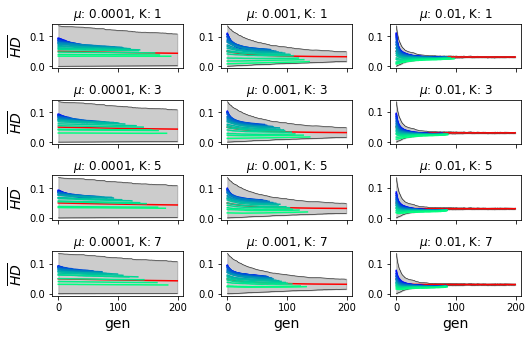

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

# Define plot parameters
plt.figure(figsize=(7.5, 5))  # Adjusted figure size for better visibility
where = 1
num_rows = 4  # 4 rows for each K value
num_cols = 3  # 3 columns for each mutation rate

# Loop through K values (rows) and mutation rates (columns)
for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)  # Create subplot
        where += 1
        
        # Load and plot drift data
        D = driftCollector.get(f"{my} {names[2]}")
        if D is not None:
            D = np.array(D)
            Dmin = D.min(axis=0)
            Dmax = D.max(axis=0)
            ax.fill_between(range(len(Dmin)), Dmin, Dmax, color='k', alpha=0.2)
            ax.plot(Dmax, 'k', linewidth=0.5)
            ax.plot(Dmin, 'k', linewidth=0.5)
            ax.plot(D.mean(axis=0), 'r')

        # Load and plot shrunk data
        M = collectorShrunk.get(f"{K} {my}")
        if M:
            M = M[2]  # Extract the relevant data for plotting
            for i in range(21):
                ax.plot(M[i], color=cmapWinter(np.linspace(0, 1, 21)[i]))

        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14)
        else:
            ax.set_xticklabels([])  # Remove x-tick labels for other rows

# Adjust layout for better spacing and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('LODhd_New.pdf', dpi=300, bbox_inches='tight')
plt.show()


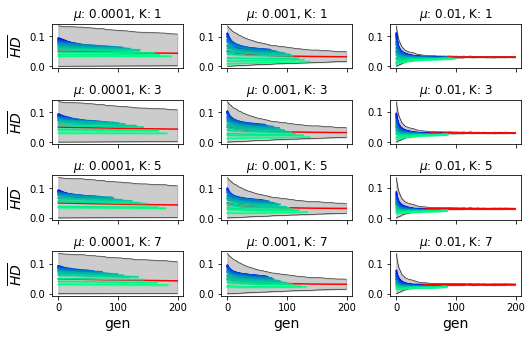

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

# Start figure
plt.figure(figsize=(7.5, 5))
where = 1
num_rows = 4
num_cols = 3

for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1

        # Plot drift data
        D = np.array(driftCollector[f"{my} {names[2]}"])
        Dmin = D.min(0)
        Dmax = D.max(0)
        ax.fill_between(range(200), Dmin, Dmax, color='k', alpha=0.2)
        ax.plot(Dmax, 'k', linewidth=0.5)
        ax.plot(Dmin, 'k', linewidth=0.5)
        ax.plot(D.mean(0), 'r')

        # Load shrunk data and CIs for trait 'E' (index 0)
        mean_lines = collectorShrunk[f"{K} {my}"][0][2]
        ci_bounds = collectorShrunk[f"{K} {my}"][1][2]

        colors = cmapWinter(np.linspace(0, 1, 21))
        for i in range(21):
            ci_lower, ci_upper = ci_bounds[i]
            x = np.arange(len(mean_lines[i]))
            ax.fill_between(x, ci_lower, ci_upper, color=colors[i], alpha=0.2)
            ax.plot(mean_lines[i], color=colors[i])

        # Titles and axis labels
        ax.set_title(f"$\\mu$: {my}, K: {K}", fontsize=12)
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)
        if row == num_rows - 1:
            ax.set_xlabel("gen", fontsize=14)
        else:
            ax.set_xticklabels([])

# Final layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('LODHD_new_CI.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [34]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ks_2samp

# Cohen's d function
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))
    return (mean1 - mean2) / pooled_std if pooled_std > 0 else 0.0

# Parameters
names = ['E', 'P', 'HD']
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]
trait_idx = 0  # Trait 'E'
results = []

for trait in [names[trait_idx]]:  # Only 'E'
    for K in Ks:
        for my in Mys:
            key = f"{K} {my}"
            try:
                raw_data = collectorShrunk[key][1][trait_idx]  # list of 21 lines
                for i, line_data in enumerate(raw_data):  # each line_data: (reps, timepoints)

                    # Convert line_data to np.array safely
                    line_data = np.array(line_data)
                    if line_data.ndim != 2 or line_data.shape[1] < 2:
                        continue

                    start = line_data[:, 0]
                    end = line_data[:, -1]

                    # Drop NaNs
                    start = start[~np.isnan(start)]
                    end = end[~np.isnan(end)]

                    if len(start) > 1 and len(end) > 1:
                        d = cohens_d(start, end)
                        t_p = ttest_ind(start, end, equal_var=False).pvalue
                        ks_p = ks_2samp(start, end).pvalue
                    else:
                        d, t_p, ks_p = np.nan, np.nan, np.nan

                    results.append({
                        'Trait': trait,
                        'K': K,
                        'Mu': my,
                        'Line': i,
                        "Cohen's d": float(d),
                        't-test p': float(t_p) if not np.isnan(t_p) else None,
                        'KS-test p': float(ks_p) if not np.isnan(ks_p) else None
                    })
            except Exception as e:
                print(f"[ERROR] Skipped {key} due to: {e}")
                continue

# Create DataFrame
df_results = pd.DataFrame(results)

# Print and Save
print(df_results)
df_results.to_csv("cohens_d_trait_E.csv", index=False)
print("\nSaved to 'cohens_d_trait_E.csv'")


    Trait  K      Mu  Line  Cohen's d  t-test p  KS-test p
0       E  1  0.0001     0   2.482502  0.142522   0.333333
1       E  1  0.0001     1   3.328564  0.084553   0.333333
2       E  1  0.0001     2   3.215317  0.088804   0.333333
3       E  1  0.0001     3   2.779200  0.112927   0.333333
4       E  1  0.0001     4   2.281653  0.153795   0.333333
..    ... ..     ...   ...        ...       ...        ...
247     E  7  0.0100    16  -0.466467  0.703957   1.000000
248     E  7  0.0100    17  -1.313568  0.369125   0.333333
249     E  7  0.0100    18  -1.707917  0.275919   0.333333
250     E  7  0.0100    19  -2.911703  0.141001   0.333333
251     E  7  0.0100    20  -3.709348  0.090986   0.333333

[252 rows x 7 columns]

Saved to 'cohens_d_trait_E.csv'


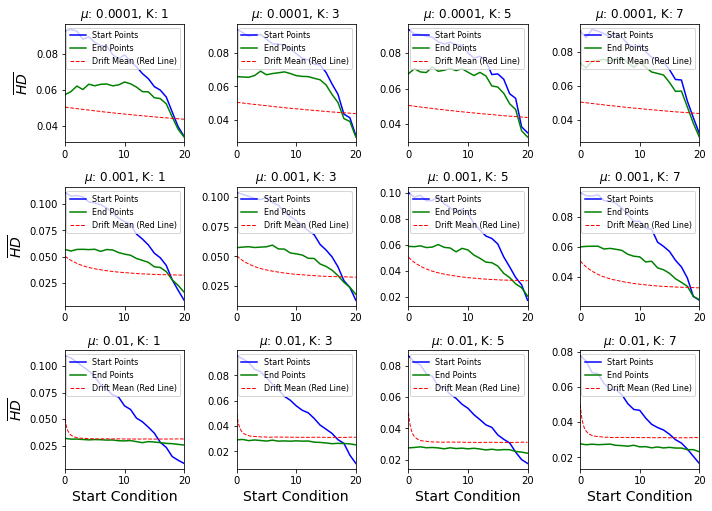

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define plot parameters
plt.figure(figsize=(10, 7.5))  # Larger figure for better visibility
where = 1
num_rows = 3
num_cols = 4

# Loop through mutation rates and K values
for row, my in enumerate(Mys):
    for col, K in enumerate(Ks):
        ax = plt.subplot(num_rows, num_cols, where)  # Create subplot
        where += 1
        
        # Load the drift data for HD
        D = driftCollector[f"{my} {names[2]}"]
        D = np.array(D)
        red_line = D.mean(0)  # Red line represents the mean HD over generations
        
        # Extract start and end points for each starting condition
        M = collectorShrunk[f"{K} {my}"][2]  # Load the shrunk data for HD
        start_points = []
        end_points = []
        conditions = range(21)
        
        # Extract start and end points for each condition dynamically
        for i in conditions:
            start_points.append(M[i][0])  # HD at the first generation
            if len(M[i]) > 0:
                end_points.append(M[i][-1])   # HD at the last available generation
            else:
                end_points.append(np.nan)  # Handle case where M[i] is empty
        
        # Plot the start points line
        ax.plot(conditions, start_points, linestyle='-', color='blue', label='Start Points')
        
        # Plot the end points line
        ax.plot(conditions, end_points, linestyle='-', color='green', label='End Points')
        
        # Plot the red line as a dotted line
        ax.plot(np.linspace(0, 20, len(red_line)), red_line, 'r--', linewidth=1, label='Drift Mean (Red Line)')
        
        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("Start Condition", fontsize=14)
        
        # Set x-axis and y-axis limits
        ax.set_xlim(0, 20)
        #ax.set_ylim(0, 1.2)  # Adjust based on your expected HD range
        
        # Add legend
        ax.legend(loc='upper right', fontsize=8)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for better spacing
#plt.savefig('Start_End_HD_Plot.pdf', dpi=300, bbox_inches='tight')
plt.show()


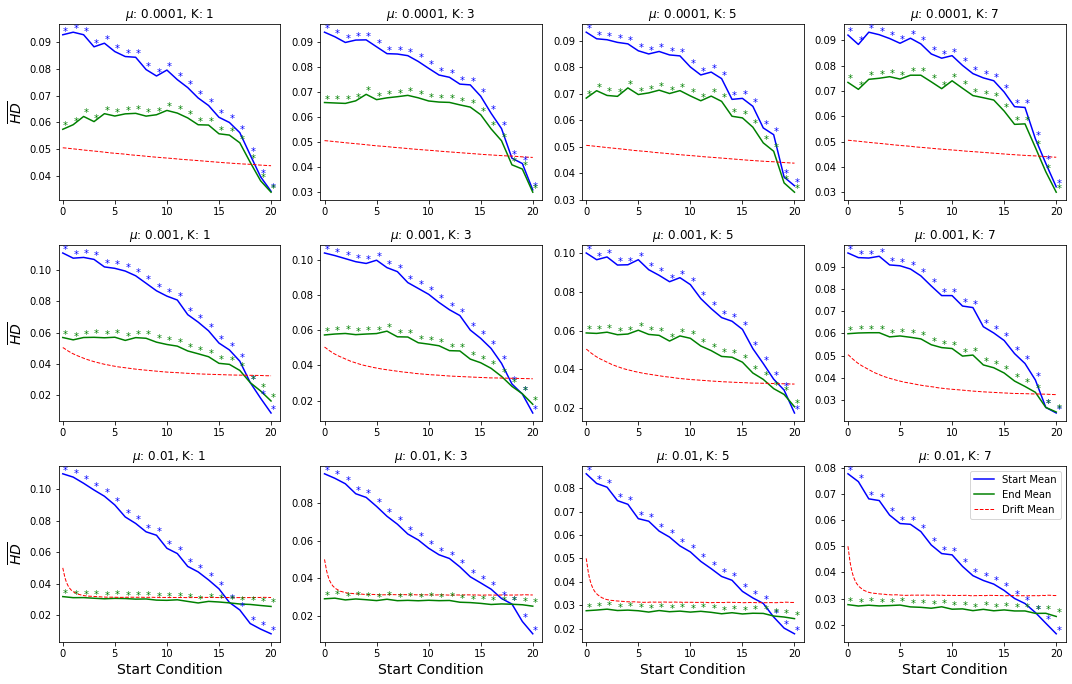

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import ks_2samp

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define the mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

plt.figure(figsize=(15, 10))  # Larger figure for better visibility
where = 1
num_rows = 3
num_cols = 4

# Loop through mutation rates and K values
for row, my in enumerate(Mys):
    for col, K in enumerate(Ks):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1
        
        # Load the drift data for HD
        D = driftCollector[f"{my} {names[2]}"]
        D = np.array(D)
        drift_mean = D.mean(axis=0)  # Drift mean over generations
        drift_start_distribution = D[:, 0]  # Start point distribution for drift
        
        # Load the shrunk data for HD
        M = collectorShrunk[f"{K} {my}"][2]
        
        # Initialize lists to collect distributions
        start_distributions = []
        end_distributions = []
        conditions = range(21)
        
        # Extract start and end distributions for each starting condition
        for i in conditions:
            start_vals = []
            end_vals = []
            
            # Collect data across all replicates
            for replicate in range(50):
                if len(M[i]) > 0:
                    start_vals.append(M[i][0])  # Start point (generation 0)
                    end_vals.append(M[i][-1])  # End point (last generation)
            
            start_distributions.append(start_vals)
            end_distributions.append(end_vals)
        
        # Calculate the mean of start and end points for plotting
        start_means = [np.mean(start_distributions[i]) if len(start_distributions[i]) > 0 else np.nan for i in conditions]
        end_means = [np.mean(end_distributions[i]) if len(end_distributions[i]) > 0 else np.nan for i in conditions]
        
        # Plot the mean start and end lines
        ax.plot(conditions, start_means, linestyle='-', color='blue', label='Start Mean')
        ax.plot(conditions, end_means, linestyle='-', color='green', label='End Mean')
        
        # Plot the red line as the mean drift line
        ax.plot(np.linspace(0, 20, len(drift_mean)), drift_mean, 'r--', linewidth=1, label='Drift Mean')
        
        # Perform KS tests and mark significant differences
        for i in conditions:
            # KS test for start points vs. drift
            if len(start_distributions[i]) > 1:
                ks_stat_start, p_value_start = ks_2samp(start_distributions[i], drift_start_distribution)
                if p_value_start < 0.05:
                    ax.text(i, start_means[i], '*', color='blue', fontsize=10)

            # KS test for end points vs. drift
            if len(end_distributions[i]) > 1:
                ks_stat_end, p_value_end = ks_2samp(end_distributions[i], drift_start_distribution)
                if p_value_end < 0.05:
                    ax.text(i, end_means[i], '*', color='green', fontsize=10)
        
        # Set the title for each subplot
        ax.set_title(f"$\mu$: {my}, K: {K}", fontsize=12)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("Start Condition", fontsize=14)
        
        # Set x-axis and y-axis limits
        ax.set_xlim(-0.4, 20.9)
        #ax.set_ylim(0, max(drift_mean) * 1.2)
        
        # Add legend
        if row == num_rows - 1 and col == num_cols - 1:
            ax.legend(loc='upper right', fontsize=10)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('KS_Test_Distribution_Start_End.pdf', dpi=300, bbox_inches='tight')
plt.show()


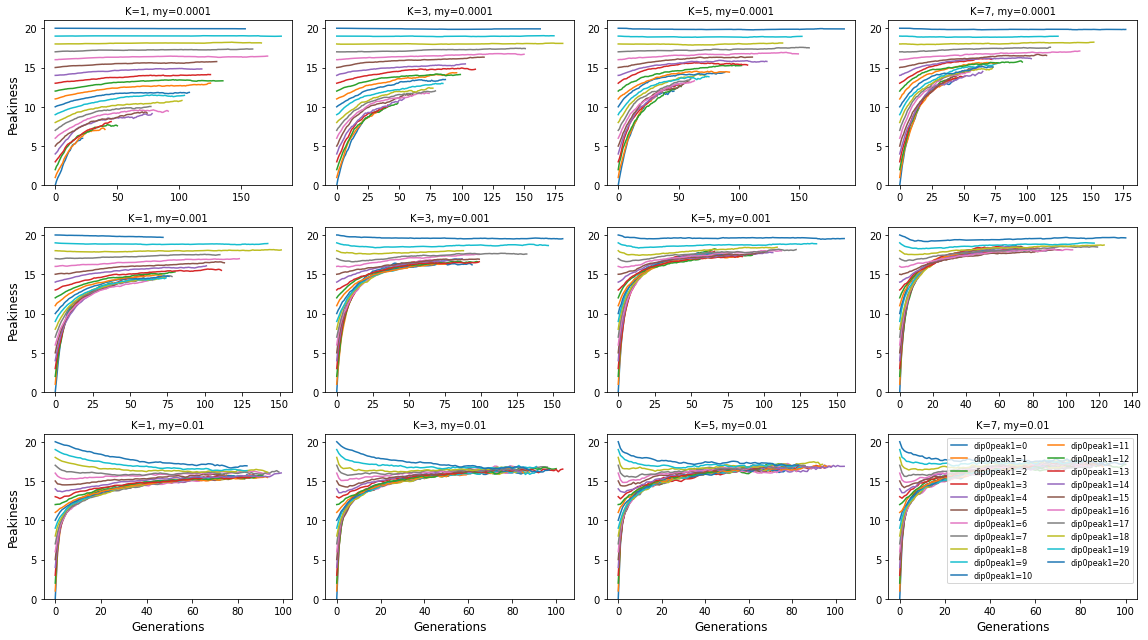

In [25]:
# meanProminance over 50 replicates.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to parse and evaluate 2D list stored as a string
def myEval2D(S):
    M = []
    s = S.replace("[[", "").replace("]]", "")
    for E in s.split("],["):
        R = []
        for e in E.split(","):
            R.append(float(e))
        M.append(R)
    return M

# Function to calculate peakiness
def calculate_peakiness(LODw_row, LODneighbor_row):
    LODw_list = pd.eval(LODw_row)  # Evaluate the fitness values over generations
    LODneighbor_list = myEval2D(LODneighbor_row)  # Evaluate the neighboring mutant fitness values over generations
    
    peakiness = []
    for gen_idx in range(len(LODw_list)):
        current_fitness = LODw_list[gen_idx]
        neighbor_fitness_list = LODneighbor_list[gen_idx]
        
        # Count neighbors with lower fitness than the current organism
        count_lower_fitness = np.sum(np.fromiter((1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness), dtype=int))

        #count_lower_fitness = np.sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
        peakiness.append(count_lower_fitness)
    
    return peakiness

# Define parameters
k_values = [1, 3, 5, 7]
mutation_rates = [0.0001, 0.001, 0.01]
dip0peak1_range = range(21)  # Values from 0 to 20
num_replicates = 50

# Create a subplot with 3 rows and 4 columns
fig, axes = plt.subplots(3, 4, figsize=(16, 9))

# Loop over mutation rates (for rows)
for row_idx, mutation_rate in enumerate(mutation_rates):
    # Loop over K values (for columns)
    for col_idx, K in enumerate(k_values):
        ax = axes[row_idx, col_idx]
        mean_peakiness_data = {}

        # Calculate mean peakiness for each dip0peak1 value over 50 replicates
        for dip0peak1 in dip0peak1_range:
            all_peakiness = []  # Store peakiness data across all replicates

            # Loop through all replicates
            for replicate in range(1, num_replicates + 1):
                file_path = os.path.join(
                    r'C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart',
                    f'data_{K}_{mutation_rate}_{replicate}.csv'
                )
                
                try:
                    # Load CSV file
                    data = pd.read_csv(file_path)

                    # Filter rows by 'dip0peak1'
                    filtered_data = data[data['dip0peak1'] == dip0peak1]

                    # Calculate peakiness for each row
                    peakiness_data = []
                    for _, row in filtered_data.iterrows():
                        LODw_row = row['LODw']
                        LODneighbor_row = row['LODneighbor']
                        peakiness = calculate_peakiness(LODw_row, LODneighbor_row)
                        peakiness_data.append(peakiness)

                    # Calculate mean peakiness across rows for the current replicate
                    if peakiness_data:
                        replicate_peakiness = pd.DataFrame(peakiness_data).mean(axis=0)
                        all_peakiness.append(replicate_peakiness)
                
                except FileNotFoundError:
                    print(f"File not found: {file_path}. Skipping this replicate.")
            
            # Compute mean peakiness over all replicates for current dip0peak1
            if all_peakiness:
                min_length = min(len(p) for p in all_peakiness)
                truncated_peakiness = [p[:min_length] for p in all_peakiness]
                combined_peakiness = pd.concat(truncated_peakiness, axis=1).mean(axis=1, skipna=True)
                mean_peakiness_data[dip0peak1] = combined_peakiness
            else:
                mean_peakiness_data[dip0peak1] = []

        # Plot the lines for each dip0peak1 in the current subplot
        for dip0peak1 in dip0peak1_range:
            if len(mean_peakiness_data[dip0peak1]) > 0:
                ax.plot(mean_peakiness_data[dip0peak1], label=f'dip0peak1={dip0peak1}', linewidth=1.5)

        # Set y-axis limits and labels
        ax.set_ylim(0, 21)
        ax.set_title(f"K={K}, my={mutation_rate}", fontsize=10)
        if row_idx == 2:
            ax.set_xlabel('Generations', fontsize=12)
        if col_idx == 0:
            ax.set_ylabel('Peakiness', fontsize=12)

        # Add legend to the last subplot
        if row_idx == 2 and col_idx == 3:
            ax.legend(loc='upper right', fontsize=8, ncol=2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


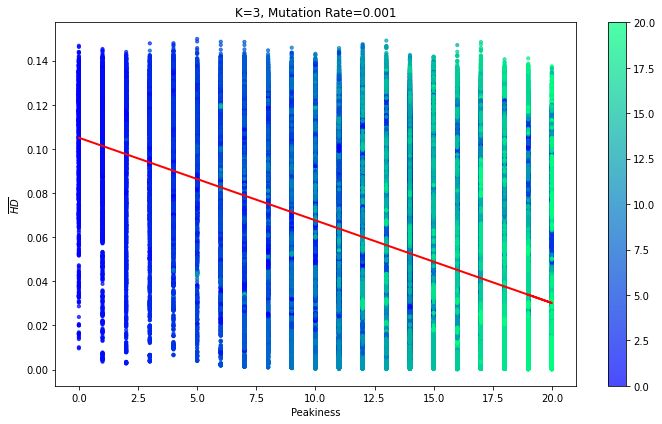

In [91]:
#galat hai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os


# Updated peakiness function
def calculate_peakiness(LODw_row, LODneighbor_row):
    LODw_list = pd.eval(LODw_row)
    LODneighbor_list = myEval2D(LODneighbor_row)
    peakiness = []
    
    # Loop through each generation and count how many neighbors have lower fitness
    for gen_idx in range(len(LODw_list)):
        current_fitness = LODw_list[gen_idx]
        neighbor_fitness_list = LODneighbor_list[gen_idx]
        count_lower_fitness = np.sum(np.fromiter(
            (1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness),
            dtype=int
        ))
        peakiness.append(count_lower_fitness)
    
    return (peakiness)

# Parameters for the specific plot
K = 3
mutation_rate = 0.001
condition_range = range(21)
cmapWinter = plt.get_cmap('winter')

# Initialize lists to store peakiness and LODhd data across replicates
all_peakiness = []
all_LODhd = []
all_conditions = []

# Loop over 50 replicates for the chosen (K, mutation_rate) combination
for replicate in range(1, 51):
    file_path = os.path.join(
        r'C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart', 
        f'data_{K}_{mutation_rate}_{replicate}.csv'
    )

    try:
        # Load the CSV file for this replicate
        data = pd.read_csv(file_path)

        # Loop through all conditions (dip0peak1 values from 0 to 20)
        for condition in condition_range:
            filtered_data = data[data['dip0peak1'] == condition]

            for _, row_data in filtered_data.iterrows():
                LODw_row = row_data['LODw']
                LODneighbor_row = row_data['LODneighbor']
                LODhd_row = row_data['LODhd']

                # Calculate peakiness
                peakiness = calculate_peakiness(LODw_row, LODneighbor_row)
                LODhd_list = pd.eval(LODhd_row)

                # Store all values across generations for each condition
                for gen_idx in range(len(LODhd_list)):
                    all_peakiness.append(peakiness[gen_idx])
                    all_LODhd.append(LODhd_list[gen_idx])
                    all_conditions.append(condition)

    except FileNotFoundError:
        print(f"File not found: {file_path}. Skipping this replicate.")

# Convert lists to numpy arrays for easier handling
all_peakiness = np.array(all_peakiness)
all_LODhd = np.array(all_LODhd)
all_conditions = np.array(all_conditions)

# Check if data is available to plot
if len(all_peakiness) > 0 and len(all_LODhd) > 0:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))

    # Plot data points with color based on `dip0peak1` using the winter colormap
    scatter = plt.scatter(all_peakiness, all_LODhd, 
                          c=all_conditions, cmap=cmapWinter, alpha=0.7, s=10)

    # Fit a linear regression line to the entire dataset
    reg = LinearRegression().fit(all_peakiness.reshape(-1, 1), all_LODhd)
    trendline = reg.predict(all_peakiness.reshape(-1, 1))
    plt.plot(all_peakiness, trendline, color='red', linewidth=2, label='Linear Fit')
    
    # Add labels, title, and legend
    plt.title(f'K={K}, Mutation Rate={mutation_rate}')
    plt.xlabel('Peakiness')
    plt.ylabel(r'$\overline{HD}$')
    cbar = plt.colorbar(scatter)
    #cbar.set_label('dip0peak1 Condition')
    
    # Save and display the plot
    plt.tight_layout()
    plt.show()


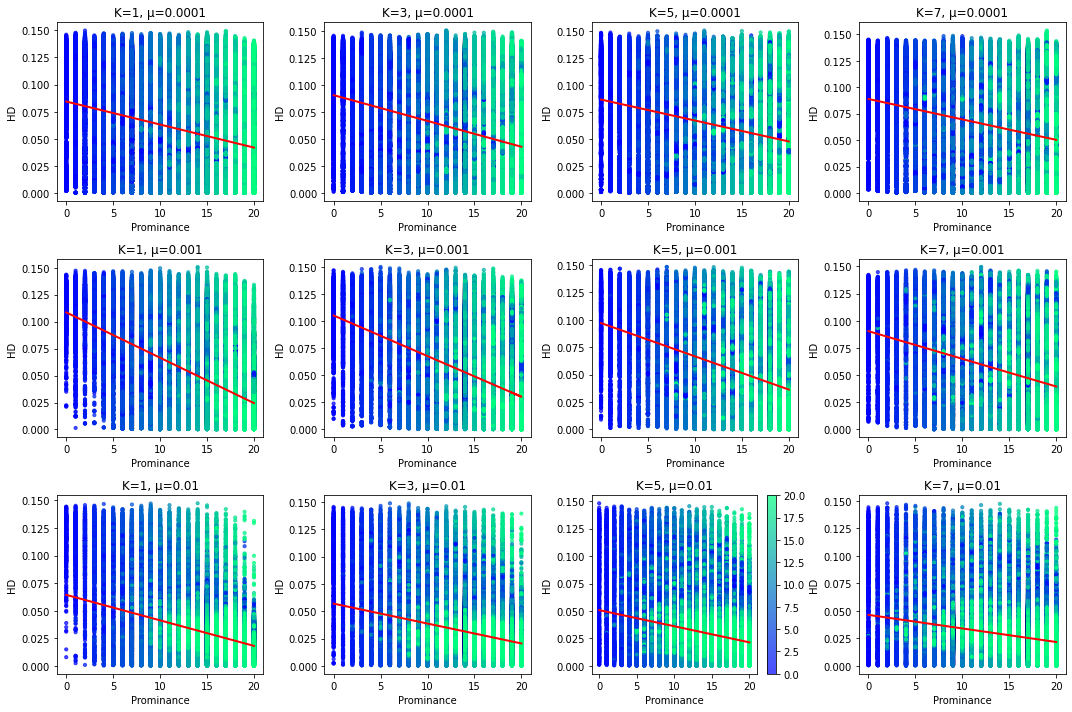

In [95]:
#Galat hai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# Updated peakiness function
def calculate_peakiness(LODw_row, LODneighbor_row):
    LODw_list = myEval(LODw_row)  # Evaluate the current fitness values over generations
    LODneighbor_list = myEval2D(LODneighbor_row)  # Evaluate neighboring mutant fitness values over generations
    
    peakiness = []
    
    # Loop through each generation and count how many neighbors have lower fitness than current fitness
    for gen_idx in range(len(LODw_list)):
        current_fitness = LODw_list[gen_idx]
        neighbor_fitness_list = LODneighbor_list[gen_idx]
        count_lower_fitness = sum([1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness])
        peakiness.append(count_lower_fitness)
    
    return peakiness

# Parameters for the specific plot
Ks = [1, 3, 5, 7]
mutation_rates = [0.0001, 0.001, 0.01]
condition_range = range(21)  # Values from 0 to 20 (for dip0peak1)
cmapWinter = plt.get_cmap('winter')

# Loop over mutation rates and Ks to generate 12 plots
plt.figure(figsize=(15, 10))
where = 1

for mutation_rate in mutation_rates:
    for K in Ks:
        all_peakiness = []
        all_LODhd = []
        all_conditions = []

        # Loop over 50 replicates for each (K, mutation_rate) combination
        for replicate in range(1, 51):
            file_path = os.path.join(
                r'C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart',
                f'data_{K}_{mutation_rate}_{replicate}.csv'
            )

            try:
                data = pd.read_csv(file_path)
                for condition in condition_range:
                    filtered_data = data[data['dip0peak1'] == condition]

                    for _, row_data in filtered_data.iterrows():
                        LODw_row = row_data['LODw']
                        LODneighbor_row = row_data['LODneighbor']
                        LODhd_row = row_data['LODhd']

                        # Calculate peakiness using the updated function
                        peakiness = calculate_peakiness(LODw_row, LODneighbor_row)
                        LODhd_list = pd.eval(LODhd_row)

                        all_peakiness.extend(peakiness)
                        all_LODhd.extend(LODhd_list)
                        all_conditions.extend([condition] * len(LODhd_list))

            except FileNotFoundError:
                print(f"File not found: {file_path}. Skipping this replicate.")

        # Plot for each combination of K and mutation rate
        ax = plt.subplot(3, 4, where)
        where += 1

        # Create scatter plot
        scatter = ax.scatter(all_peakiness, all_LODhd, c=all_conditions, cmap=cmapWinter, alpha=0.7, s=10)
        reg = LinearRegression().fit(np.array(all_peakiness).reshape(-1, 1), np.array(all_LODhd))
        trendline = reg.predict(np.array(all_peakiness).reshape(-1, 1))
        ax.plot(all_peakiness, trendline, color='red', linewidth=2)

        ax.set_title(f"K={K}, μ={mutation_rate}", fontsize=12)
        ax.set_xlabel('Prominance')
        ax.set_ylabel('HD')

        if where == 12:
            plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.savefig('Correlation.pdf', dpi=300)
plt.show()


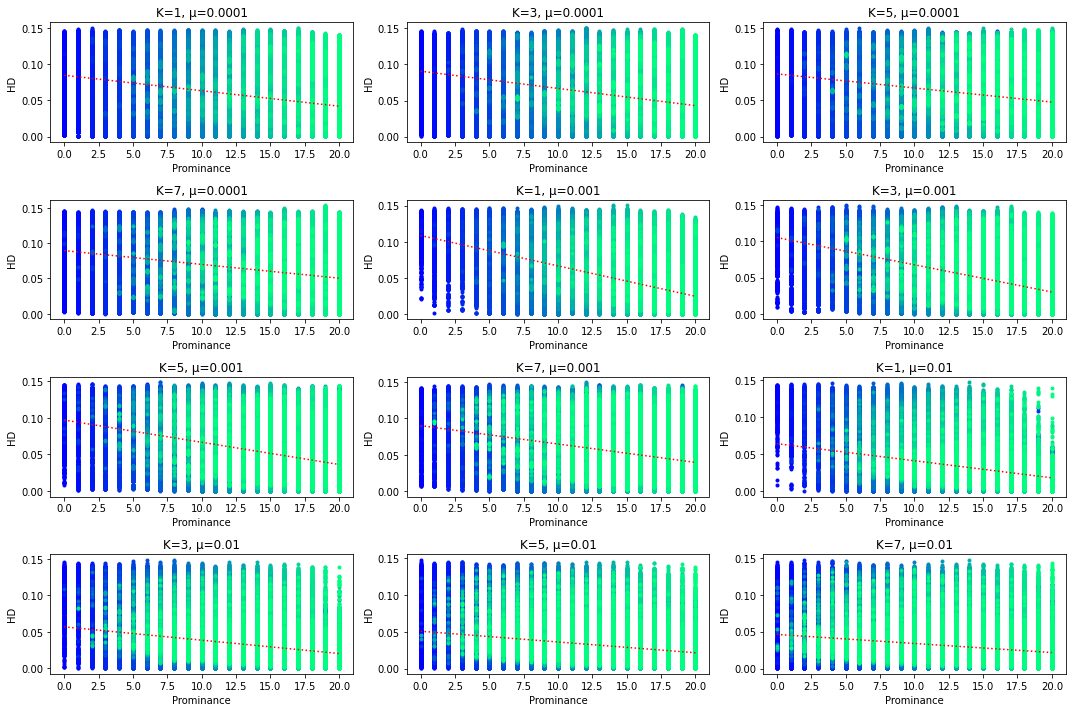

In [98]:
#Sir ka code hai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
Ks = [1, 3, 5, 7]
mutation_rates = [0.0001, 0.001, 0.01]
condition_range = range(21)
cmapWinter = plt.get_cmap('winter')

# Collector dictionary to store data
collector = {}

# Loop over mutation rates and Ks
for K in Ks:
    for mutation_rate in mutation_rates:
        # Initialize lists for each condition (0 to 20)
        E, P, HD, Prom = [[] for _ in range(21)], [[] for _ in range(21)], [[] for _ in range(21)], [[] for _ in range(21)]
        
        # Process 50 replicates for each (K, mutation_rate) combination
        for replicate in range(50):
            file_path = os.path.join(
                r'C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart',
                f'data_{K}_{mutation_rate}_{replicate}.csv'
            )

            try:
                # Read the CSV file
                data = pd.read_csv(file_path)
                
                # Loop through each row in the data
                for i in range(len(data)):
                    pos = data["dip0peak1"][i]
                    
                    # Evaluate LODe, LODp, and LODhd
                    LODe_value = myEval(data["LODe"][i])
                    LODp_value = myEval(data["LODp"][i])
                    LODhd_value = myEval(data["LODhd"][i])
                    
                    # Store values in the corresponding lists
                    E[pos].append(LODe_value)
                    P[pos].append(LODp_value)
                    HD[pos].append(LODhd_value)
                    
                    # Calculate prominence (Prom)
                    LODneighbor_value = myEval2D(data["LODneighbor"][i])
                    LODw_value = myEval(data["LODw"][i])
                    peakiness = []
                    for t in range(len(LODw_value)):
                        peakiness.append((1 * (np.array(LODneighbor_value[t]) < LODw_value[t])).sum())
                    Prom[pos].append(peakiness)
            
            except FileNotFoundError:
                print(f"File not found: {file_path}. Skipping this replicate.")
        
        # Store the collected data for plotting
        collector[f"{K} {mutation_rate}"] = [E, P, HD, Prom]

# Plotting
plt.figure(figsize=(15, 10))
where = 1

for mutation_rate in mutation_rates:
    for K in Ks:
        E, P, HD, Prom = collector[f"{K} {mutation_rate}"]

        # Prepare for scatter plots
        XX, YY = [], []

        plt.subplot(4, 3, where)
        where += 1

        # Scatter plot data for each condition (0 to 20)
        for condition in condition_range:
            X = []
            Y = []
            for j in range(len(HD[condition])):
                X += list(Prom[condition][j])
                Y += list(HD[condition][j])
            
            # Plot points for each condition with colors
            plt.plot(X, Y, '.', color=cmapWinter(np.linspace(0, 1, 21)[condition]))
            XX += X
            YY += Y

        # Fit and plot a linear trendline
        if len(XX) > 0:
            res = np.polyfit(XX, YY, 1)
            x = np.linspace(0, 20, 21)
            y = np.polyval(res, x)
            plt.plot(x, y, ':r')

        plt.title(f"K={K}, μ={mutation_rate}")
        plt.xlabel('Prominance')
        plt.ylabel('HD')

plt.tight_layout()
plt.savefig('Correlation_updated.pdf', dpi=300)
plt.show()


In [35]:
collector=dict()
Mys=[0.0001,0.001,0.01]
Ks=[1,3,5,7]
for K in Ks:
    for my in Mys:
        E=[]
        P=[]
        HD=[]
        for i in range(21):
            E.append([])
            P.append([])
            HD.append([])
        for rep in range(50):
            #for who in range(3):
            data=read_csv(r"C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart\data_{0}_{1}_{2}.csv".format(K,my,rep))
            for i in range(len(data)):
                pos=data["dip0peak1"][i]
                dummy=myEval(data["LODe"][i])
                E[pos].append(dummy[0])
                dummy=myEval(data["LODp"][i])
                P[pos].append(dummy[0])
                dummy=myEval(data["LODhd"][i])
                HD[pos].append(dummy[0])
        collector["{0} {1}".format(K,my)]=[E,P,HD]

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipython-input-100-c69e49654bab>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
<ipytho

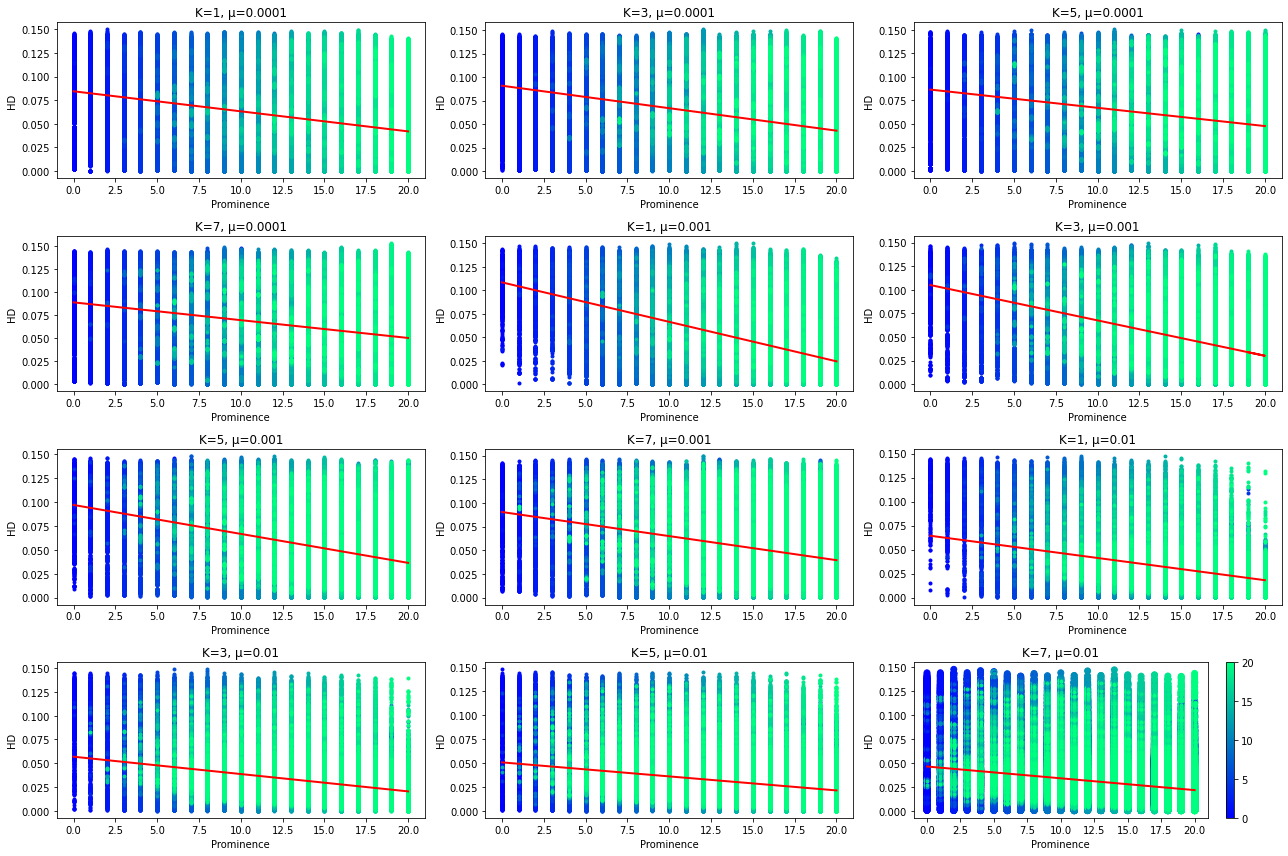

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os


# Function to calculate peakiness
def calculate_peakiness(LODw_row, LODneighbor_row):
    LODw_list = myEval(LODw_row)
    LODneighbor_list = myEval2D(LODneighbor_row)
    
    peakiness = []
    for gen_idx in range(len(LODw_list)):
        current_fitness = LODw_list[gen_idx]
        neighbor_fitness_list = LODneighbor_list[gen_idx]
        count_lower_fitness = sum(1 for neighbor_fitness in neighbor_fitness_list if neighbor_fitness < current_fitness)
        peakiness.append(count_lower_fitness)
    
    return peakiness

# Parameters for the plots
Ks = [1, 3, 5, 7]
mutation_rates = [0.0001, 0.001, 0.01]
condition_range = range(21)
cmapWinter = plt.get_cmap('winter')

# Loop over mutation rates and Ks to generate 12 plots
plt.figure(figsize=(18, 12))
where = 1

# Outer loops for mutation rates and Ks
for mutation_rate in mutation_rates:
    for K in Ks:
        # Initialize separate lists for each condition (0 to 20)
        condition_peakiness = {i: [] for i in condition_range}
        condition_LODhd = {i: [] for i in condition_range}

        for replicate in range(1, 51):
            file_path = os.path.join(
                r'C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart',
                f'data_{K}_{mutation_rate}_{replicate}.csv'
            )

            try:
                data = pd.read_csv(file_path)
                
                # Loop through each condition (0 to 20)
                for condition in condition_range:
                    filtered_data = data[data['dip0peak1'] == condition]

                    # Process each row within the filtered data
                    for _, row_data in filtered_data.iterrows():
                        LODw_row = row_data['LODw']
                        LODneighbor_row = row_data['LODneighbor']
                        LODhd_row = row_data['LODhd']

                        # Calculate peakiness using the function
                        peakiness = calculate_peakiness(LODw_row, LODneighbor_row)
                        LODhd_list = myEval(LODhd_row)
                        
                        # Store data separately by condition
                        condition_peakiness[condition].extend(peakiness)
                        condition_LODhd[condition].extend(LODhd_list)

            except FileNotFoundError:
                print(f"File not found: {file_path}. Skipping this replicate.")
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

        # Plot for each combination of K and mutation rate
        ax = plt.subplot(4, 3, where)
        where += 1

        # Plot data for each condition (0 to 20) with different colors
        for condition in condition_range:
            X = condition_peakiness[condition]
            Y = condition_LODhd[condition]

            # Plot only if there is data for this condition
            if len(X) > 0 and len(Y) > 0:
                ax.plot(X, Y, '.', color=cmapWinter(np.linspace(0, 1, 21)[condition]))

        # Fit a linear regression model to the combined data
        all_X = [x for condition in condition_range for x in condition_peakiness[condition]]
        all_Y = [y for condition in condition_range for y in condition_LODhd[condition]]
        
        if len(all_X) > 0 and len(all_Y) > 0:
            reg = LinearRegression().fit(np.array(all_X).reshape(-1, 1), np.array(all_Y))
            trendline = reg.predict(np.array(all_X).reshape(-1, 1))
            ax.plot(all_X, trendline, color='red', linewidth=2)

        ax.set_title(f"K={K}, μ={mutation_rate}", fontsize=12)
        ax.set_xlabel('Prominence')
        ax.set_ylabel('HD')

        # Add colorbar to the last plot
        if where == 13:
            plt.colorbar(ax.scatter(all_X, all_Y, c=[i for condition in condition_range for i in [condition] * len(condition_peakiness[condition])], cmap=cmapWinter), ax=ax, orientation='vertical')

plt.tight_layout()
plt.savefig('Correlation_Separated.pdf', dpi=300)
plt.show()


K=1, μ=0.0001, Start Condition 0: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 0: p-value (End) = 1.3819e-11
K=1, μ=0.0001, Start Condition 1: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 1: p-value (End) = 5.4289e-12
K=1, μ=0.0001, Start Condition 2: p-value (Start) = 1.0264e-19
K=1, μ=0.0001, End Condition 2: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 3: p-value (Start) = 1.8155e-18
K=1, μ=0.0001, End Condition 3: p-value (End) = 5.4289e-12
K=1, μ=0.0001, Start Condition 4: p-value (Start) = 4.4158e-19
K=1, μ=0.0001, End Condition 4: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 5: p-value (Start) = 7.1522e-18
K=1, μ=0.0001, End Condition 5: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 6: p-value (Start) = 2.7061e-17
K=1, μ=0.0001, End Condition 6: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Condition 7: p-value (Start) = 2.7061e-17
K=1, μ=0.0001, End Condition 7: p-value (End) = 2.0873e-12
K=1, μ=0.0001, Start Con

K=3, μ=0.001, Start Condition 0: p-value (Start) = 5.0985e-24
K=3, μ=0.001, End Condition 0: p-value (End) = 1.3819e-11
K=3, μ=0.001, Start Condition 1: p-value (Start) = 3.1237e-23
K=3, μ=0.001, End Condition 1: p-value (End) = 1.3819e-11
K=3, μ=0.001, Start Condition 2: p-value (Start) = 1.7809e-22
K=3, μ=0.001, End Condition 2: p-value (End) = 1.3819e-11
K=3, μ=0.001, Start Condition 3: p-value (Start) = 9.5093e-22
K=3, μ=0.001, End Condition 3: p-value (End) = 1.3819e-11
K=3, μ=0.001, Start Condition 4: p-value (Start) = 9.5093e-22
K=3, μ=0.001, End Condition 4: p-value (End) = 1.3819e-11
K=3, μ=0.001, Start Condition 5: p-value (Start) = 1.7809e-22
K=3, μ=0.001, End Condition 5: p-value (End) = 1.3819e-11
K=3, μ=0.001, Start Condition 6: p-value (Start) = 4.7806e-21
K=3, μ=0.001, End Condition 6: p-value (End) = 5.4289e-12
K=3, μ=0.001, Start Condition 7: p-value (Start) = 1.0264e-19
K=3, μ=0.001, End Condition 7: p-value (End) = 1.3819e-11
K=3, μ=0.001, Start Condition 8: p-value

K=5, μ=0.01, Start Condition 18: p-value (Start) = 4.7226e-10
K=5, μ=0.01, End Condition 18: p-value (End) = 4.7226e-10
K=5, μ=0.01, Start Condition 19: p-value (Start) = 5.4289e-12
K=5, μ=0.01, End Condition 19: p-value (End) = 4.7226e-10
K=5, μ=0.01, Start Condition 20: p-value (Start) = 2.8932e-13
K=5, μ=0.01, End Condition 20: p-value (End) = 2.0130e-10
K=7, μ=0.0001, Start Condition 0: p-value (Start) = 1.0264e-19
K=7, μ=0.0001, End Condition 0: p-value (End) = 3.6526e-14
K=7, μ=0.0001, Start Condition 1: p-value (Start) = 1.8155e-18
K=7, μ=0.0001, End Condition 1: p-value (End) = 1.0347e-13
K=7, μ=0.0001, Start Condition 2: p-value (Start) = 1.0264e-19
K=7, μ=0.0001, End Condition 2: p-value (End) = 1.2546e-14
K=7, μ=0.0001, Start Condition 3: p-value (Start) = 1.0264e-19
K=7, μ=0.0001, End Condition 3: p-value (End) = 1.2546e-14
K=7, μ=0.0001, Start Condition 4: p-value (Start) = 4.4158e-19
K=7, μ=0.0001, End Condition 4: p-value (End) = 1.2546e-14
K=7, μ=0.0001, Start Condition

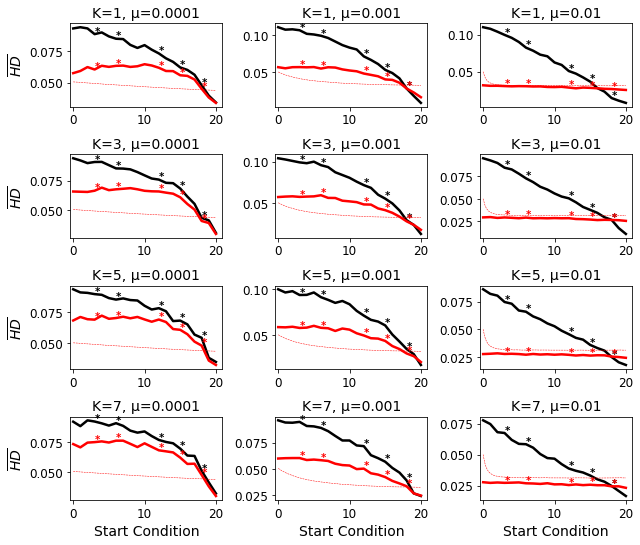

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import ks_2samp

# Load the colormap and data
cmapWinter = plt.get_cmap('winter')
driftCollector = pickle.load(open(r"C:\Users\pmh\NKEarlyData\driftCollector.p", "rb"))
names = ['E', 'P', 'HD']

# Define the mutation rates and K values
Mys = [0.0001, 0.001, 0.01]
Ks = [1, 3, 5, 7]

plt.figure(figsize=(9, 8))
where = 1
num_rows = 4
num_cols = 3

# Loop through K values (rows) and mutation rates (columns)
for row, K in enumerate(Ks):
    for col, my in enumerate(Mys):
        ax = plt.subplot(num_rows, num_cols, where)
        where += 1
        
        # Load the drift data for HD
        D = driftCollector[f"{my} {names[2]}"]
        D = np.array(D)
        drift_mean = D.mean(axis=0)
        drift_start_distribution = D[:, 0]

        # Load the shrunk data for HD
        M = collectorShrunk[f"{K} {my}"][2]
        
        # Initialize lists to collect distributions
        start_distributions = []
        end_distributions = []
        conditions = range(21)
        
        # Extract start and end distributions for each starting condition
        for i in conditions:
            start_vals = []
            end_vals = []
            
            for replicate in range(50):
                if len(M[i]) > 0:
                    start_vals.append(M[i][0])  # Start point (generation 0)
                    end_vals.append(M[i][-1])  # End point (last generation)
            
            start_distributions.append(start_vals)
            end_distributions.append(end_vals)
        
        # Calculate the mean of start and end points for plotting
        start_means = [np.mean(start_distributions[i]) if len(start_distributions[i]) > 0 else np.nan for i in conditions]
        end_means = [np.mean(end_distributions[i]) if len(end_distributions[i]) > 0 else np.nan for i in conditions]
        
        # Plot the mean start and end lines with bold lines
        ax.plot(conditions, start_means, linestyle='-', color='black', linewidth=2.5, label='Start Mean')
        ax.plot(conditions, end_means, linestyle='-', color='red', linewidth=2.5, label='End Mean')
        
        # Plot the mean drift line in bold
        ax.plot(np.linspace(0, 20, len(drift_mean)), drift_mean, 'r--', linewidth=0.5, label='Drift Mean')
        #ax.plot(np.linspace(0, 20, len(drift_mean)), drift_mean, 'k+', linewidth=2.5, label='Drift Mean')
        # Perform KS tests and print p-values in scientific notation
        for i in conditions:
            if len(start_distributions[i]) > 1:
                ks_stat_start, p_value_start = ks_2samp(start_distributions[i], drift_start_distribution)
                print(f"K={K}, μ={my}, Start Condition {i}: p-value (Start) = {p_value_start:.4e}")
                
                if i in [3, 6, 12, 15, 18] and p_value_start < 0.05:
                    ax.text(i, start_means[i], '*', color='black', fontsize=10, fontweight='bold')
            
            if len(end_distributions[i]) > 1:
                ks_stat_end, p_value_end = ks_2samp(end_distributions[i], drift_start_distribution)
                print(f"K={K}, μ={my}, End Condition {i}: p-value (End) = {p_value_end:.4e}")
                
                if i in [3, 6, 12, 15, 18] and p_value_end < 0.05:
                    ax.text(i, end_means[i], '*', color='red', fontsize=10, fontweight='bold')
        
        # Set the title for each subplot
        ax.set_title(f"K={K}, μ={my}", fontsize=14)

        # Show y-axis label only on the first column
        if col == 0:
            ax.set_ylabel(r"$\overline{HD}$", fontsize=14)

        # Show x-axis label only on the last row
        if row == num_rows - 1:
            ax.set_xlabel("Start Condition", fontsize=14)
        
        # Set x-axis limits
        ax.set_xlim(-0.4, 20.9)

        # Increase x-tick font size
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        
        # Add legend to the last subplot
        #if row == num_rows - 1 and col == num_cols - 1:
            #ax.legend(loc='upper right', fontsize=)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('KS-Test_StartEnd_Bold.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [118]:
collector=dict()
Mys=[0.0001,0.001,0.01]
Ks=[1,3,5,7]
for K in Ks:
    for my in Mys:
        E=[]
        P=[]
        HD=[]
        Prom=[]
        for i in range(21):
            E.append([])
            P.append([])
            HD.append([])
            Prom.append([])
        for rep in range(50):
            data=read_csv(r"C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart\data_{0}_{1}_{2}.csv".format(K,my,rep))
            for i in range(len(data)):
                pos=data["dip0peak1"][i]
                dummy=myEval(data["LODe"][i])
                E[pos].append(dummy)
                dummy=myEval(data["LODp"][i])
                P[pos].append(dummy)
                dummy=myEval(data["LODhd"][i])
                HD[pos].append(dummy)
                nb=myEval2D(data["LODneighbor"][i])
                w=myEval(data["LODw"][i])
                p=[]
                #print(len(dummy),len(nb),len(w))
                for t in range(len(w)):
                    p.append((1*(numpy.array(nb[t])<w[t])).sum())
                Prom[pos].append(p)
        collector["{0} {1}".format(K,my)]=[E,P,HD,Prom]

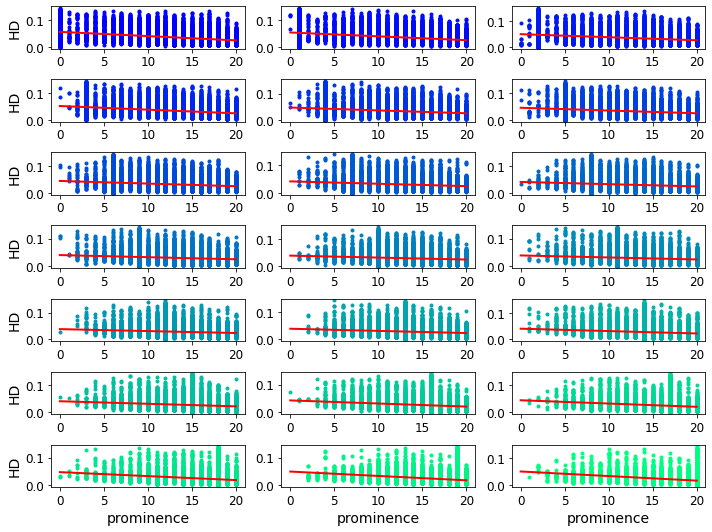

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
cmap = plt.get_cmap('winter')  # You can replace 'viridis' with any other colormap name

# Adjust the figure size for better visibility
plt.figure(figsize=(10, 7.5))  # Adjusted figure size

for i in range(21):
    ax = plt.subplot(7, 3, i + 1)  # Create subplot in a 7x3 grid
    X = []
    Y = []
    
    # Collect data points
    for j in range(len(HD[i])):
        X += list(Prom[i][j])
        Y += list(HD[i][j])
    
    # Scatter plot
    ax.plot(X, Y, '.', color=cmap(np.linspace(0, 1, 21)[i]))
    
    # Linear fit
    res = np.polyfit(X, Y, 1)
    x = np.linspace(0, 20, 21)
    y = np.polyval(res, x)
    ax.plot(x, y, 'r', linewidth=2)

    # Set labels
    if i % 3 == 0:  # Y-axis label only for first column
        ax.set_ylabel("HD", fontsize=14)
    if i >= 18:      # X-axis label only for last row
        ax.set_xlabel("prominence", fontsize=14)
    
    # Set x and y tick label sizes
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Correlation_21.pdf', dpi=300)
plt.show()


In [19]:
Ks=[0,1,3,5,7]
Mys=[0.0001,0.001,0.01]
E=[]
P=[]
HD=[]
for i in range(100):
    E.append([])
    P.append([])
    HD.append([])
for K in Ks:
    for my in Mys:
        for n in range(50):
            data=read_csv(r'C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart\data_{0}_{1}_{2}.csv'.format(K,my,n))
            for i in range(len(data)):
                e=myEval(data["startE"][i])
                p=myEval(data["startP"][i])
                hd=myEval(data["startHD"][i])
            for i in range(100):
                E[i].append(e[i])
                P[i].append(p[i])
                HD[i].append(hd[i])

In [20]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def line_intersect(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    """ returns a (x, y) tuple or None if there is no intersection """
    #from https://rosettacode.org/wiki/Find_the_intersection_of_two_lines#Python
    d = (By2 - By1) * (Ax2 - Ax1) - (Bx2 - Bx1) * (Ay2 - Ay1)
    if d:
        uA = ((Bx2 - Bx1) * (Ay1 - By1) - (By2 - By1) * (Ax1 - Bx1)) / d
        uB = ((Ax2 - Ax1) * (Ay1 - By1) - (Ay2 - Ay1) * (Ax1 - Bx1)) / d
    else:
        return
    if not(0 <= uA <= 1 and 0 <= uB <= 1):
        return
    x = Ax1 + uA * (Ax2 - Ax1)
    y = Ay1 + uA * (Ay2 - Ay1)
    return x, y

def ourDistance(A,B):
    deltas=A-B
    direction=(1.0*(deltas>0.0)).astype(int)
    above=0.0
    below=0.0
    for i in range(A.shape[0]-1):
        situation=direction[i]+2*direction[i+1]
        if situation==0:
            #both B>A
            above+=PolyArea([i,i,i+1,i+1],[A[i],B[i],A[i+1],B[i+1]])
        if situation==1:
            mx,my=line_intersect(i,A[i],i+1,A[i+1],i,B[i],i+1,B[i+1])
            below+=PolyArea([i,i,mx],[A[i],B[i],my])
            above+=PolyArea([mx,i+1,i+1],[my,A[i+1],B[i+1]])
        if situation==2:
            mx,my=line_intersect(i,A[i],i+1,A[i+1],i,B[i],i+1,B[i+1])
            above+=PolyArea([i,i,mx],[A[i],B[i],my])
            below+=PolyArea([mx,i+1,i+1],[my,A[i+1],B[i+1]])
        if situation==3:
            #both B<A
            below+=PolyArea([i,i,i+1,i+1],[A[i],B[i],A[i+1],B[i+1]])
    return above,below

In [26]:
R=numpy.array(E[50]).mean(0)

In [27]:
R

0.0373442044

In [12]:
data=read_csv(r'C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart\data_1_0.01_2.csv')

In [16]:
import pandas as pd
len(pd.eval(data['startE'][0]))

100

0 dip 0.9962 peak 0.9978 slope 99.4465
1 dip 10.4831 peak 17.488 slope 99.4392
3 dip 77.5787 peak 83.2572 slope 98.3061
5 dip 88.8217 peak 90.0396 slope 97.2526
7 dip 91.6745 peak 91.8081 slope 96.0085


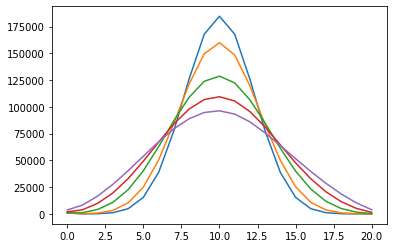

In [44]:
Ks=[0,1,3,5,7]
actualPeaks=[]
actualDips=[]
actualSlopes=[]
FLScollector=dict()
for K in Ks:
    C=[]
    P=[]
    D=[]
    S=[]
    M=[]
    Ws=numpy.zeros((100,21))
    for n in range(100):
        data=read_csv(r"C:\Users\pmh\NKEarlyData\dataFLS.tar\dataFLS\FLS_FLS_{0}_{1}.csv".format(K,n))
        S=S+list(data["slope"])
        P=P+list(data["peak"])
        D=D+list(data["dip"])
        for i in range(len(data)):
            C.append(list(myEval(data["dist"][i])))
            M.append(list(myEval(data["bin"][i])))
            Ws+=numpy.array(myEval2D(data["bin"][0])).transpose()
        Ws/=100
    C=numpy.array(C)
    plot(C.mean(0))
    print(K,"dip",mean(D),"peak",mean(P),"slope",mean(S))
    FLScollector[K]=[numpy.array(M),Ws,C]

In [45]:
pickle.dump(FLScollector,open("FLScollector.p","wb"))

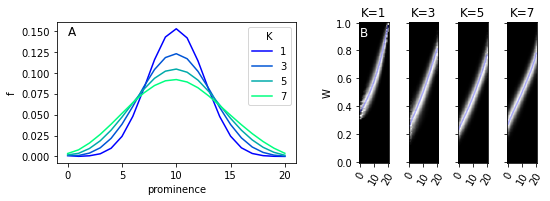

In [57]:
FLScollector = pickle.load(open("FLScollector.p", "rb"))
cmapWinter = plt.get_cmap('winter')
fig = figure(figsize=[7.5, 3])

# Main plot
ax_main = subplot(1, 10, (1, 5))
for k, K in enumerate(Ks[1:]):
    M, W, C = FLScollector[K]
    ax_main.plot(C.mean(0) / (1024 * 1024), color=cmapWinter(linspace(0, 1, 4)[k]), label=str(K))
legend(title="K")
xlabel("prominence")
ylabel("f")
text(0, 0.145, "A", fontsize=12)

# Subplots for different Ks
for k, K in enumerate(Ks[1:]):
    ax = subplot(1, 10, k + 7)
    M, W, C = FLScollector[K]
    W = W.transpose()
    for i in range(21):
        W[i] /= W[i].max()
    W = W.transpose()
    imshow(W, cmap="gray")
    ylim(-0.5, 99.5)
    if k == 0:
        yticks([0, 20, 40, 60, 80, 99], [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    else:
        yticks([0, 20, 40, 60, 80, 99], [""] * 6)
    title("K=" + str(K))
    if k == 0:
        ylabel("W")
        text(0, 90, "B", fontsize=12, color="w")
    xticks([0, 10, 20], rotation=60)
    m = []
    M, W, C = FLScollector[K]
    for i in range(21):
        w = W.transpose()[i]
        w /= w.sum()
        w = w * linspace(0, 1, 100)
        m.append(w.sum() * 100)
    plot(m, 'b', alpha=0.3)

# Add a shared x-label
#fig.text(0.9, 0.05, 'Prominence', ha='center', va='center', fontsize=10)

# Adjust layout manually to prevent clipping
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.25)

# Save the figure
savefig("fitnessProminence.pdf", bbox_inches='tight')


In [58]:
collector=dict()
Mys=[0.0001,0.001,0.01]
Ks=[1,3,5,7]
for K in Ks:
    for my in Mys:
        E=[]
        P=[]
        HD=[]
        Prom=[]
        for i in range(21):
            E.append([])
            P.append([])
            HD.append([])
            Prom.append([])
        for rep in range(50):
            data=read_csv(r"C:\Users\pmh\NKEarlyData\dataAllStart.tar\dataAllStart\data_{0}_{1}_{2}.csv".format(K,my,rep))
            for i in range(len(data)):
                pos=data["dip0peak1"][i]
                dummy=myEval(data["LODe"][i])
                E[pos].append(dummy)
                dummy=myEval(data["LODp"][i])
                P[pos].append(dummy)
                dummy=myEval(data["LODhd"][i])
                HD[pos].append(dummy)
                nb=myEval2D(data["LODneighbor"][i])
                w=myEval(data["LODw"][i])
                p=[]
                #print(len(dummy),len(nb),len(w))
                for t in range(len(w)):
                    p.append((1*(numpy.array(nb[t])<w[t])).sum())
                Prom[pos].append(p)
        collector["{0} {1}".format(K,my)]=[E,P,HD,Prom]

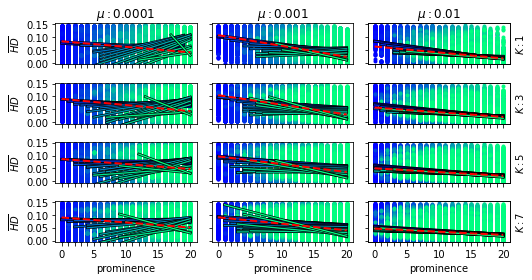

In [61]:
from matplotlib import colormaps
cmap = plt.get_cmap('winter')#'nipy_spectral') #winter')  # You can replace 'viridis' with any other colormap name

figure(figsize=[7.5,4])
where=1
for K in Ks:
    for my in Mys:
        E,P,HD,Prom=collector["{0} {1}".format(K,my)]
        subplot(4,3,where)
        XX=[]
        YY=[]
        xy=[]
        for i in range(21):
            X=[]
            Y=[]
            for j in range(len(HD[i])):
                X+=list(Prom[i][j])
                Y+=list(HD[i][j])
            plot(numpy.array(X),Y,'.',color=cmap(linspace(0,1,21)[i]))
            res=polyfit(X,Y,1)
            x=linspace(min(X),max(X),21)
            y=polyval(res,x)
            XX+=X
            YY+=Y
            xy.append([x,y])
        for i in range(21):
            x,y=xy[i]
            plot(x,y,"k",linewidth=2.6)
            plot(x,y,linewidth=1.3,color=cmap(linspace(0,1,21)[i]))

        res=polyfit(XX,YY,1)
        x=linspace(0,20,21)
        y=polyval(res,x)
        plot(x,y,'--r',linewidth=2)
        ylim(-0.005,0.154)
        if where in [1,4,7,10]:
            ylabel(r"$\overline{HD}$")
            yticks([0,0.05,0.1,0.15])
        else:
            yticks([0,0.05,0.1,0.15],[""]*4)
        if where in [1,2,3]:
            title(r"$\mu:$"+str(my))
        if where in [10,11,12]:
            xticks(range(21),["0","","","","","5","","","","","10","","","","","15","","","","","20"])
            xlabel("prominence")
        else:
            xticks(range(21),[""]*21)
        if where in [3,6,9,12]:
            twinx()
            ylabel(r"$K:{0}$".format(K))
            yticks([])
        where+=1
    
tight_layout()
plt.savefig('Correlation_AllSC.png',dpi=150)

In [12]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def line_intersect(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    """ returns a (x, y) tuple or None if there is no intersection """
    #from https://rosettacode.org/wiki/Find_the_intersection_of_two_lines#Python
    d = (By2 - By1) * (Ax2 - Ax1) - (Bx2 - Bx1) * (Ay2 - Ay1)
    if d:
        uA = ((Bx2 - Bx1) * (Ay1 - By1) - (By2 - By1) * (Ax1 - Bx1)) / d
        uB = ((Ax2 - Ax1) * (Ay1 - By1) - (Ay2 - Ay1) * (Ax1 - Bx1)) / d
    else:
        return
    if not(0 <= uA <= 1 and 0 <= uB <= 1):
        return
    x = Ax1 + uA * (Ax2 - Ax1)
    y = Ay1 + uA * (Ay2 - Ay1)
    return x, y

def ourDistance(A,B):
    deltas=A-B
    direction=(1.0*(deltas>0.0)).astype(int)
    above=0.0
    below=0.0
    for i in range(A.shape[0]-1):
        situation=direction[i]+2*direction[i+1]
        if situation==0:
            #both B>A
            above+=PolyArea([i,i,i+1,i+1],[A[i],B[i],A[i+1],B[i+1]])
        if situation==1:
            mx,my=line_intersect(i,A[i],i+1,A[i+1],i,B[i],i+1,B[i+1])
            below+=PolyArea([i,i,mx],[A[i],B[i],my])
            above+=PolyArea([mx,i+1,i+1],[my,A[i+1],B[i+1]])
        if situation==2:
            mx,my=line_intersect(i,A[i],i+1,A[i+1],i,B[i],i+1,B[i+1])
            above+=PolyArea([i,i,mx],[A[i],B[i],my])
            below+=PolyArea([mx,i+1,i+1],[my,A[i+1],B[i+1]])
        if situation==3:
            #both B<A
            below+=PolyArea([i,i,i+1,i+1],[A[i],B[i],A[i+1],B[i+1]])
    return above,below

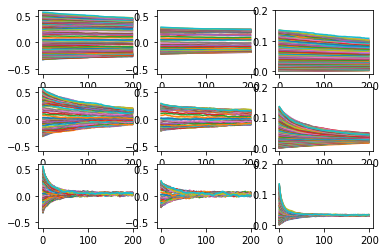

In [21]:
driftCollector=dict()
where=1
name=["E","P","HD"]
for my in [0.0001,0.001,0.01]:
    for who in range(3):
        subplot(3,3,where)
        M=collector[my][who]
        D=[]
        for i in range(100):
            L=collector[my][3][i]
            l=int(mean(L)*10)
            l=2000
            Y=step_function_expand(M[i],l)
            Y=numpy.array(Y).mean(0)
            binWidth=10
            pooled_array = numpy.mean(Y[:len(Y) - len(Y) % binWidth].reshape(-1, binWidth), axis=1)    
            plot(pooled_array)
            D.append(pooled_array)
        driftCollector["{0} {1}".format(my,name[who])]=D
        if who<2:
            ylim(-0.6,0.6)
        else:
            ylim(-0.01,0.2)
        where+=1